### Libraries

In [1]:
library(dviz.supp)
library(forcats)
# library(patchwork)
library(lubridate)

Loading required package: cowplot

Loading required package: colorspace

Loading required package: colorblindr

Loading required package: ggplot2

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘dviz.supp’


The following objects are masked from ‘package:cowplot’:

    plot_grid, stamp, stamp_bad, stamp_good, stamp_ugly, stamp_wrong


The following object is masked from ‘package:datasets’:

    CO2



Attaching package: ‘lubridate’


The following object is masked from ‘package:dviz.supp’:

    stamp


The following object is masked from ‘package:cowplot’:

    stamp


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




### Data preprocessing (mean temps)

In [2]:
temps_long <- filter(ncdc_normals,
                station_id %in% c(
                  "USW00014819", # Chicago, IL 60638
                  #"USC00516128", # Honolulu, HI 96813
                  #"USW00027502", # Barrow, AK 99723, coldest point in the US
                  "USC00042319", # Death Valley, CA 92328 hottest point in the US
                  "USW00093107", # San Diego, CA 92145
                  #"USC00427606"  # Salt Lake City, UT 84103
                  "USW00012918" # Houston, TX 77061
                )) %>%
  mutate(location = fct_recode(factor(station_id),
                               "Chicago" = "USW00014819",
                               #"Honolulu, HI" = "USC00516128",
                               #"Barrow, AK" = "USW00027502",
                               "Death Valley" = "USC00042319",
                               "San Diego" = "USW00093107",
                               #"Salt Lake City, UT" = "USC00427606",
                               "Houston" = "USW00012918")) %>%
  mutate(location = factor(location, levels = c("Death Valley", "Houston", "San Diego", "Chicago")))

head(temps_long)

station_id,month,day,temperature,flag,date,location
<chr>,<chr>,<chr>,<dbl>,<chr>,<date>,<fct>
USC00042319,01,1,51.0,S,0-01-01,Death Valley
USC00042319,01,2,51.2,S,0-01-02,Death Valley
USC00042319,01,3,51.3,S,0-01-03,Death Valley
USC00042319,01,4,51.4,S,0-01-04,Death Valley
USC00042319,01,5,51.6,S,0-01-05,Death Valley
USC00042319,01,6,51.7,S,0-01-06,Death Valley


In [3]:
month_names <- c("01" = "Jan", "02" = "Feb", "03" = "Mar", "04" = "Apr", "05" = "May", "06" = "Jun",
                   "07" = "Jul", "08" = "Aug", "09" = "Sep", "10" = "Oct", "11" = "Nov", "12" = "Dec")


mean_temps <- temps_long %>%
  group_by(location, month) %>%
  summarize(mean = mean(temperature)) %>%
  ungroup() %>%
  mutate(month = month_names[month]) %>%
  mutate(month = factor(month, levels = unname(month_names)))

head(mean_temps)

`summarise()` has grouped output by 'location'. You can override using the
`.groups` argument.


location,month,mean
<fct>,<fct>,<dbl>
Death Valley,Jan,53.45161
Death Valley,Feb,59.94483
Death Valley,Mar,68.44839
Death Valley,Apr,76.29333
Death Valley,May,86.60645
Death Valley,Jun,95.54667


### Plot

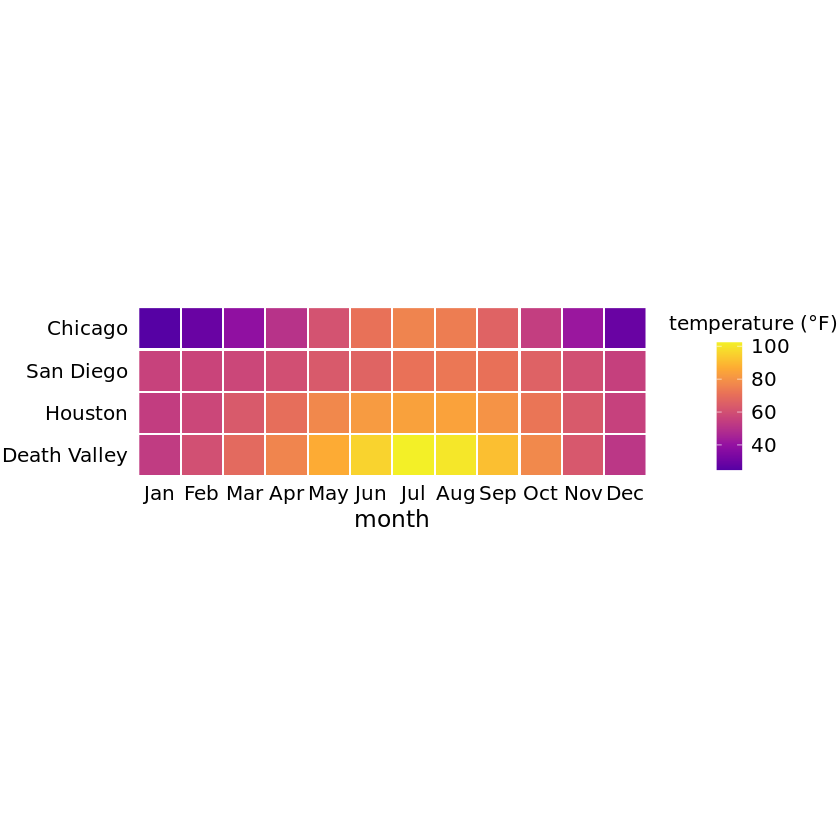

In [4]:
p <- ggplot(mean_temps, aes(x = month, y = location, fill = mean)) + 
  geom_tile(width = .95, height = 0.95) +
  scale_fill_viridis_c(option = "C", begin = 0.15, end = 0.98,
                       name = "temperature (°F)") + 
    # scale_fill_viridis_c(option = "B", begin = 0.15, end = 0.98,
    #                    name = "temperature (°F)") + 
  scale_y_discrete(name = NULL) +
  coord_fixed(expand = FALSE) +
  theme_dviz_open() +
  theme(axis.line = element_blank(),
        axis.ticks = element_blank(),
        #axis.text.y = element_text(size = 14),
        legend.title = element_text(size = 12)
        )
# fix legend (make it centered)
ggdraw(align_legend(p))
# p

In [5]:
# write.csv(mean_temps,file ="../../data/mean_temps.csv",row.names=FALSE,sep=",")

Warning message in write.csv(mean_temps, file = "../../data/mean_temps.csv", row.names = FALSE, :
“attempt to set 'sep' ignored”
